# Electronic Sales Data 

### The goal is to explore the cleaned dataset and see if we can answer some questions

Potential Analysis
1. Look for correlations with quant ordered and month/city/time
4. Filter sales by order ID to find which products are often sold together

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [4]:
df = pd.read_csv('all_data_cleaned.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9,27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   City              185950 non-null  object 
 8   Hour              185950 non-null  int64  
 9   Minute            185950 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 14.2+ MB


### Find best month for sales

Need to create a total sale column

In [27]:
df['Sales'] = (df['Quantity Ordered'] * df['Price Each'])

In [143]:
month_sales = df.groupby(['Month']).sum()['Sales']
month_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Text(0.5, 0, 'Month Number')

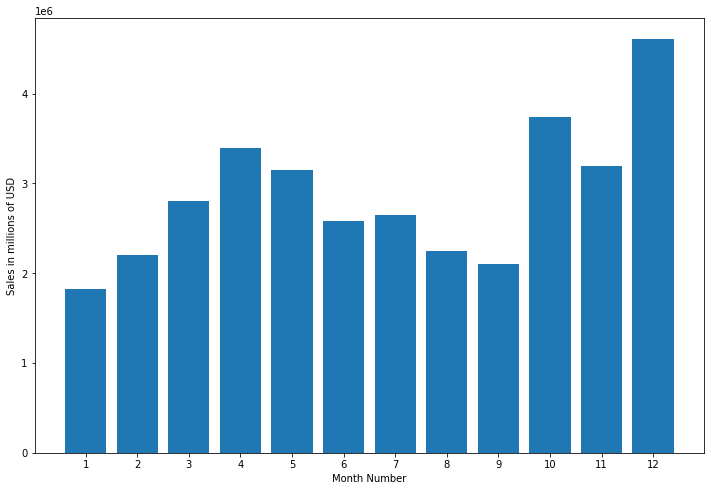

In [50]:
months = range(1,13)

plt.bar(months, month_sales)
plt.xticks(months)
plt.ylabel('Sales in millions of USD')
plt.xlabel('Month Number')

Sales die at the start of the new year. Slowly grow untill April, where they slow down again untill they shoot back up in Oct, Nov, Dec.

### Which city sold the most product

In [74]:
df.groupby(['City']).sum().sort_values('Sales', ascending = False)

,Order ID,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
City,,,,,,,
San Francisco CA,10304443952,50239,8.211462e+06,315520,643265,1319477,8.262204e+06
Los Angeles CA,6811084693,33289,5.421435e+06,208325,427444,866638,5.452571e+06
New York City NY,5736333884,27932,4.635371e+06,175741,357696,733598,4.664317e+06
Boston MA,4598265261,22528,3.637410e+06,141112,288225,590442,3.661642e+06
Atlanta GA,3423838407,16602,2.779908e+06,104794,214264,442932,2.795499e+06
Dallas TX,3415643578,16730,2.752628e+06,104620,214390,435155,2.767975e+06
Seattle WA,3406693974,16553,2.733296e+06,104941,213292,436368,2.747755e+06
Portland OR,2305594747,11303,1.860558e+06,70621,144421,295533,1.870732e+06
Austin TX,2280982185,11153,1.809874e+06,69829,141946,289060,1.819582e+06


In [108]:
df_sorted = df.groupby(['City']).sum().sort_values('Sales', ascending = False)
data = [df['City'], df['Sales']]
headers = ['City','Sales']

df_city = pd.concat(data, axis = 1, keys=headers)
df_city = df_city.groupby(['City']).sum().sort_values(['Sales'], ascending=False)
df_city.reset_index(inplace=True)

df_city.head()                          

,City,Sales
0,San Francisco CA,8.262204e+06
1,Los Angeles CA,5.452571e+06
2,New York City NY,4.664317e+06
3,Boston MA,3.661642e+06
4,Atlanta GA,2.795499e+06


[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

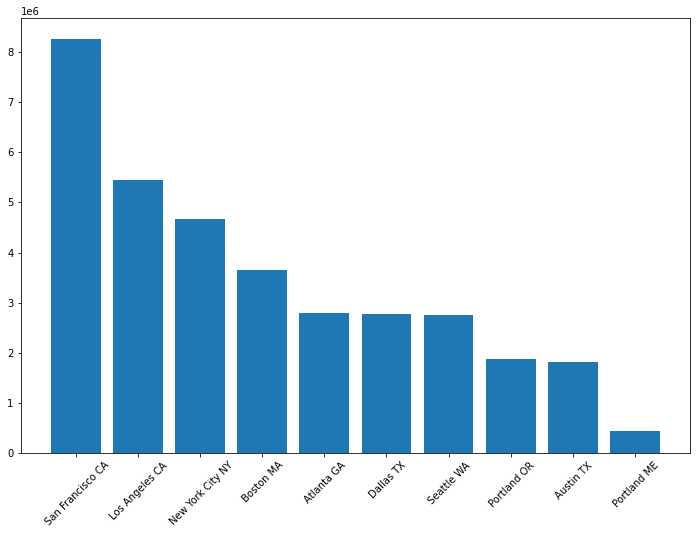

In [130]:
city = [city for city, sales in df.groupby(['City'])]
print(city)

plt.bar(df_city['City'], df_city['Sales'])
plt.xticks(rotation=45)

The cities with the most sales are San Francisco CA and Los Angeles CA. 

### How are sales dictated by time of day?

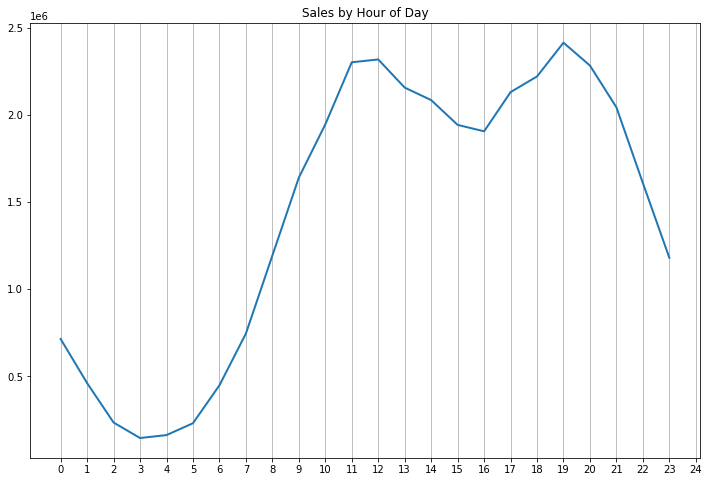

In [142]:
keys = [hour for hour, order in df.groupby(['Hour'])]

data = [df['Hour'],df['Sales']]
headers = ['Hour', 'Sales']

df_hour = pd.concat(data, axis = 1, keys=headers)
df_hour = df_hour.groupby(['Hour']).sum()

plt.plot(df_hour, linewidth=2.0)
plt.title("Sales by Hour of Day")
plt.xticks(range(0,25))
plt.grid(True, axis = 'x')

Sales spike mid day and afternoon. This information seems to allign with normal shopping hours(lunchtime and afterwork) Potential advertising might come before these popular shopping times, so people remember to shop for the items during their designated shopping time. 

What products are often sold together?

In [154]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df1 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

<ipython-input-154-5a392a8176df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [157]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Phones and their asscessories are the most common products purchased together. 

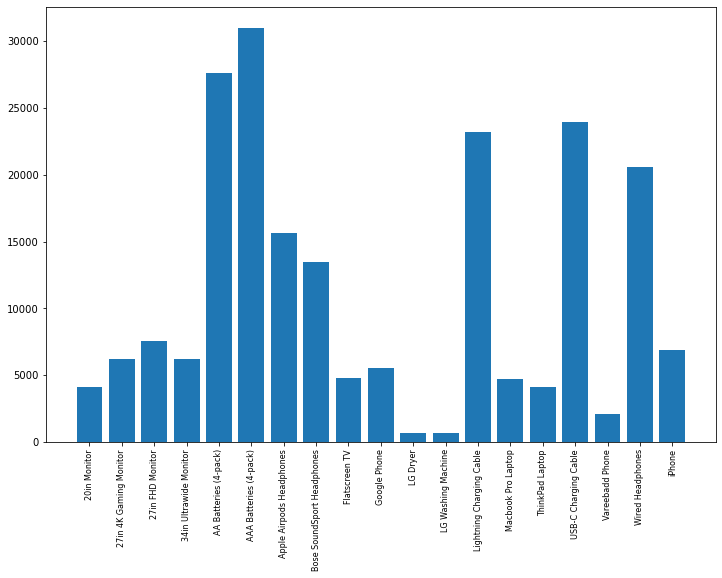

In [158]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-160-eed5dab26168>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


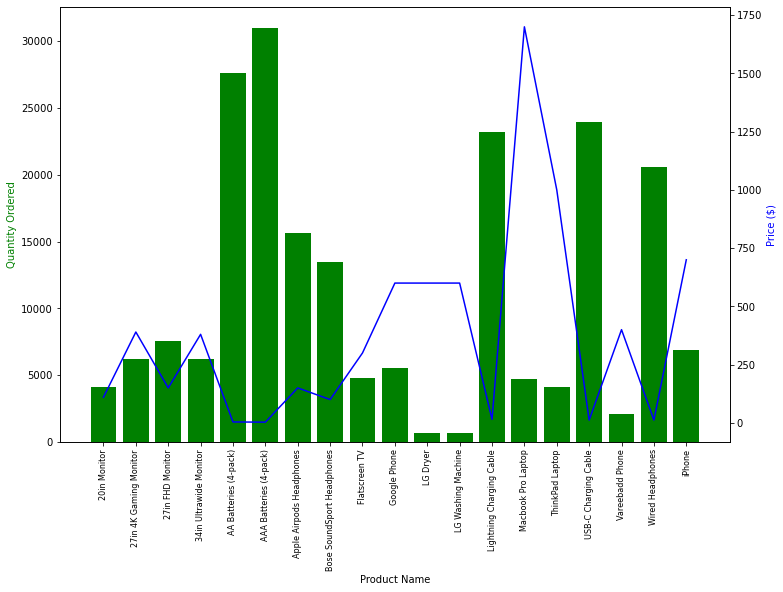

In [160]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

Price obviously heavily dictates the quantity of purchases for any given product. Laptops seem to be the most price insensitive product. This could be due to their importance in functioning in todays society.

**Summary of Observations**
- Sales die at the start of the new year. Slowly grow untill April, where they slow down again untill they shoot back up in Oct, Nov, Dec.
- The cities with the most sales are San Francisco CA and Los Angeles CA. 
- Sales spike mid day and afternoon.
- Phones and their asscessories are the most common products purchased together. 
- Laptops seem to be the most price insensitive product.